In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/Male%20and%20female%20Voice%20data%20creat%20by%20al%20arman%20ovi%20.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head(3)

,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index,label
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357,male
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067,male
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064,male


In [5]:
data['label'] = data['label'].replace(['male', 'female'],[0,1])
data['label'].value_counts()

label
0    3682
1    2311
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

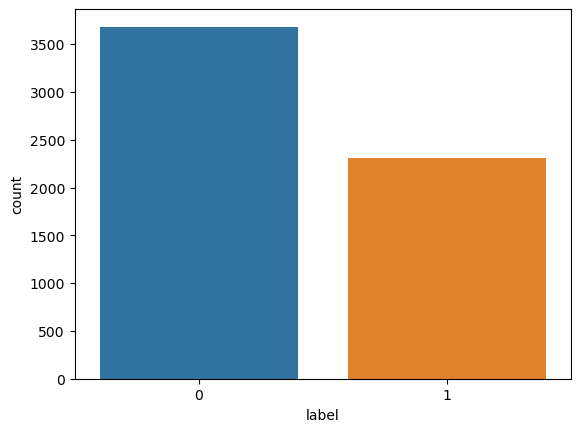

In [6]:
sn.countplot(data,x='label')

In [7]:
data.isnull().sum()

mean_freq            0
sd_freq              0
median_freq          0
q25_freq             0
q75_freq             0
iqr_freq             0
skewness             0
kurtosis_val         0
spectral_flatness    0
tempogram            0
mode_freq            0
centroid_freq        0
peak_freq            0
mean_fun             0
min_fun              0
max_fun              0
mean_dom             0
min_dom              0
max_dom              0
fund_freq            0
mod_index            0
label                0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler()

In [10]:
x = data.drop('label', axis=1)
y = data[['label']]


In [11]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [12]:
x.shape

(5993, 21)

In [13]:
y.shape

(5993, 1)

In [14]:

x.head(3)

,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,centroid_freq,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,1722.189076,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,2486.438634,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,1172.361957,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064


In [15]:
x ,y = random.fit_resample(x,y)

In [16]:
y.value_counts()

label
0        3682
1        3682
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,random_state=42 , test_size=.30)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix
lr = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier()

In [20]:
lr.fit(xtrain , ytrain)

LogisticRegression()

In [21]:
lr.score(xtrain , ytrain)

0.7504850601474583

In [22]:
lr.score(xtest , ytest)

0.7493212669683258

In [23]:
cm = confusion_matrix(ytest , lr.predict(xtest))
cm

array([[842, 276],
       [278, 814]], dtype=int64)

<Axes: >

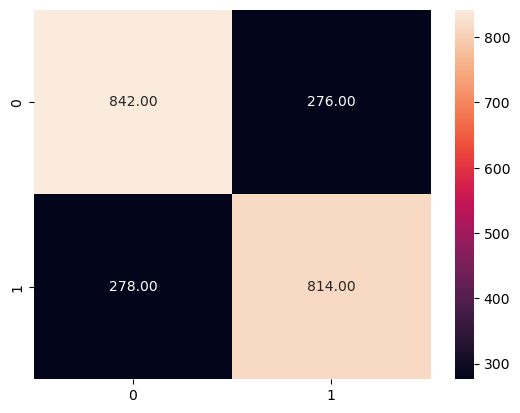

In [24]:
sn.heatmap(cm,annot = True , fmt=".2f")

In [25]:
print(classification_report(ytest,lr.predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1118
           1       0.75      0.75      0.75      1092

    accuracy                           0.75      2210
   macro avg       0.75      0.75      0.75      2210
weighted avg       0.75      0.75      0.75      2210



In [26]:
dtc.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [27]:
dtc.score(xtrain , ytrain)

1.0

In [28]:
dtc.score(xtest , ytest)

0.7936651583710407

In [29]:
print(classification_report(ytest,dtc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1118
           1       0.77      0.84      0.80      1092

    accuracy                           0.79      2210
   macro avg       0.80      0.79      0.79      2210
weighted avg       0.80      0.79      0.79      2210



In [30]:
cm2 = confusion_matrix(ytest , dtc.predict(xtest))
cm2

array([[841, 277],
       [179, 913]], dtype=int64)

<Axes: >

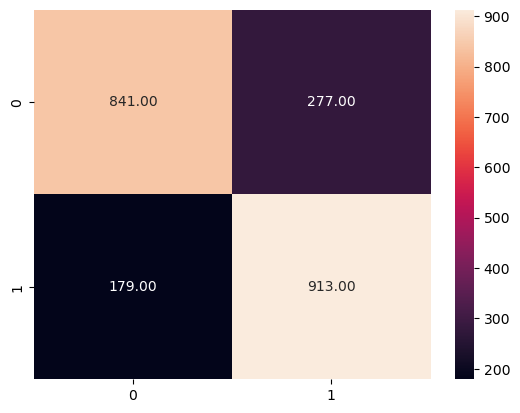

In [31]:
sn.heatmap(cm2,annot = True , fmt=".2f")

In [49]:
from sklearn.ensemble import RandomForestClassifier
rnc = RandomForestClassifier()

In [50]:
rnc.fit(xtrain,ytrain)

RandomForestClassifier()

In [51]:
rnc.score(xtrain , ytrain)

1.0

In [52]:
rnc.score(xtest , ytest)

0.851131221719457

In [53]:
cm3 = confusion_matrix(ytest , rnc.predict(xtest))
cm3

array([[943, 175],
       [154, 938]], dtype=int64)

<Axes: >

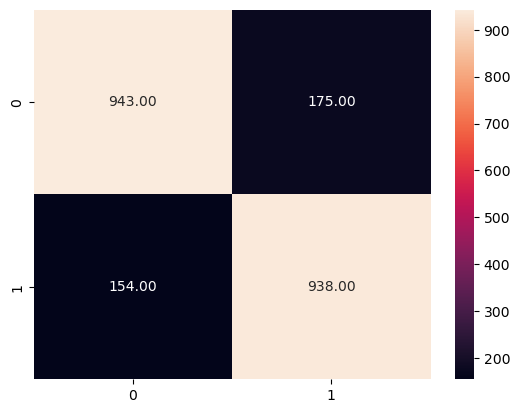

In [54]:
sn.heatmap(cm3,annot = True , fmt=".2f")

In [55]:
print(classification_report(ytest,rnc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1118
           1       0.84      0.86      0.85      1092

    accuracy                           0.85      2210
   macro avg       0.85      0.85      0.85      2210
weighted avg       0.85      0.85      0.85      2210



# cross validation 

In [56]:
from sklearn.model_selection import KFold, cross_val_score


In [57]:
kf=KFold(n_splits=10, shuffle=True)

In [58]:
result_dtc = cross_val_score(dtc,x , y, cv=kf) 

In [59]:
result_dtc

array([0.81411126, 0.80868385, 0.80597015, 0.78154681, 0.8111413 ,
       0.82472826, 0.8138587 , 0.78940217, 0.80434783, 0.83152174])

In [60]:
result_dtc.mean()

0.8085312075983719

In [61]:
result_lr = cross_val_score(lr,x , y, cv=kf) 

In [62]:
result_lr 

array([0.74762551, 0.72727273, 0.7394844 , 0.77747626, 0.76494565,
       0.74184783, 0.73505435, 0.74048913, 0.76222826, 0.77445652])

In [63]:
result_lr.mean()

0.7510880626511711

In [65]:
result_rnc = cross_val_score(rnc,x , y , cv=kf)

In [66]:
result_rnc

array([0.86567164, 0.88059701, 0.86295794, 0.87788331, 0.86956522,
       0.86413043, 0.87771739, 0.88179348, 0.86684783, 0.86005435])

In [67]:
result_rnc.mean()

0.8707218600672526

In [70]:
models = ['DecisionTreeclassifier' , 'LogisticRegression' ,'RandomForestClassifier']
results = [result_dtc.mean() ,result_lr.mean() , result_rnc.mean()]

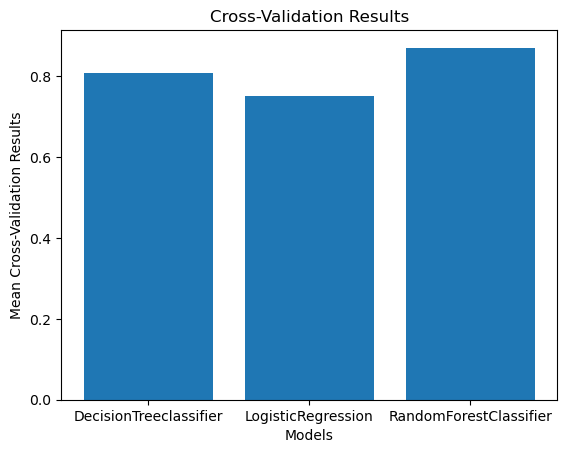

In [72]:
plt.bar(models, results)
plt.xlabel('Models')
plt.ylabel('Mean Cross-Validation Results')
plt.title('Cross-Validation Results')
plt.show()

In [73]:
from sklearn.model_selection import StratifiedKFold

In [74]:
st = StratifiedKFold(n_splits=10)

In [75]:
result2_dtc = cross_val_score(dtc, x, y, cv=st) 

In [76]:
result2_dtc.mean()

0.812622227302224

In [77]:
result2_lr = cross_val_score(lr, x, y, cv=st) 

In [78]:
result2_lr.mean()

0.7490446728806561

In [80]:
result2_rnc = cross_val_score(rnc, x, y, cv=st) 
result2_rnc

array([0.83310719, 0.86295794, 0.85481682, 0.82632293, 0.83695652,
       0.83967391, 0.89945652, 0.92119565, 0.92663043, 0.93342391])

In [81]:
result2_rnc.mean()

0.873454184118931

In [82]:
models2 = ['DecisionTreeclassifier' , 'LogisticRegression' ,'RandomForestClassifier']
results2 = [result2_dtc.mean() ,result2_lr.mean() , result2_rnc.mean()]

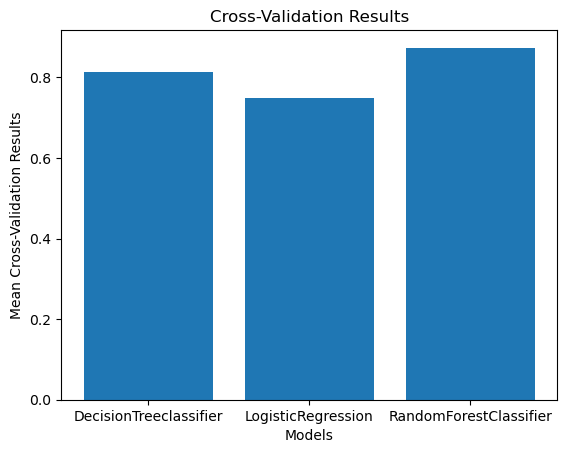

In [83]:
plt.bar(models2, results2)
plt.xlabel('Models')
plt.ylabel('Mean Cross-Validation Results')
plt.title('Cross-Validation Results')
plt.show()

In [84]:
st

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [85]:
kf

KFold(n_splits=10, random_state=None, shuffle=True)